# `DSML_WS_04` - Introduction to Visualization with Matplotlib and Seaborn

Please work on the following tasks **before** the fourth workshop session.

## 1. Analyzing flight data using Pandas

Last week, you got to know *the* core data science library in Python - Pandas. Let us put what we learned together in a small real-world case.

I have provided you with a small dataset from the City of Cologne, which is publicly available via [this link](https://www.offenedaten-koeln.de/dataset/dienstfluege-co2-stadt-koeln-2019). It contains a summary of all business flights made by employees of the city in 2019. The following information are available:
- *unit*: code of the organisational unit responsible for these flights
- *origin*: origin airport of the flight route 
- *destination*: destination airport of the flight route
- *flights*: number of flights of this route by the respective organisational unit
- *persons*: number of persons from the organisational unit taking this flight route
- *CO2*: total CO2 emitted as a result of these flights in kilograms

Load the csv file called "business_flights_cologne_2019.csv" into a pandas dataframe (note: data is separated by ";"). Afterwards, use your knowledge of pandas to answer the following questions:
1. Is the provided dataset missing data, i. e. are there missing values?
2. How many business flights took place in total in 2019?
3. How many kilograms of CO2 were emitted as a result of these flights in total in 2019?
4. Which flight route emitted most CO2 per flight per person? (hint: you can sort dataframes using `.sort_values(by='column_name', ascending=False)`)
5. Which organisational unit flew the most?
6. What was the most common destination?

In [23]:
# your code here
import pandas as pd

flightInfo = pd.read_csv("business_flights_cologne_2019.csv", sep=";")

# print(flightInfo.info()) # No missing values

print("Amount of flights in 2019: " + str(flightInfo["flights"].sum())) 

print("Amount of CO2 emission in 2019: " + str(flightInfo["CO2"].sum())) 

# Which routes have the most CO2 emissions?
flightInfo["CO2/flight/person"] = (flightInfo["CO2"] / flightInfo["flights"] / flightInfo["persons"]).round(2)
print("10 most CO2 intensive flights per person:")
print(flightInfo.sort_values(by="CO2/flight/person", ascending=False, inplace=False).head(10))

# Which unit has the most flights?
flights_by_unit = flightInfo.groupby("unit")["flights"].sum()
flights_by_unit = flights_by_unit.sort_values(ascending=False)
print("10 most units with most flights:")
print(flights_by_unit.head(10))

#What are the most popular destinations?
destinations = flightInfo.groupby("destination")["flights"].sum()
destinations = destinations.sort_values(ascending=False)
print("10 most popular destinations:")
print(destinations.head(10))



Amount of flights in 2019: 562
Amount of CO2 emission in 2019: 405108
10 most CO2 intensive flights per person:
        unit                             origin destination  flights  persons  \
16   Dez. IV   CGN -> MUC -> PEK -> SHA -> FRA:        FRA:        1        9   
57        01        AMS > PTY > MGA > ATL > AMS         AMS        1        1   
202       81  DUS > ATL > LAX > SLC > CDG > DUS         DUS        1        1   
161       52              CGN > ZRH > NBO > FRA         FRA        1        2   
25    Dez. V                               FRA:         LIM        2        1   
45        01                                FRA         GIG        2        1   
159       52                                FRA         GIG        2        5   
1    Dez. OB                                CGN         GIG        2        1   
49        01                                TXG         CGN        1        1   
227     4515                                CGN         HND        4        1 

## 2. Getting started with Matplotlib

This week, we will be using Python to visualize data. The library we will be using for this is called Matplotlib.

As always, we first have to import Matplotlib to use its functionalities within this Jupyter notebook. Execute the following cell to continue.

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Now let us create some data to visualize. Think about last week (Monday to Sunday). How many steps did you do per day? If you have a tracker like a smartwatch you could check the exact values, or just come up with some hypothetical values. Create a list of strings for each weekday (i.e., ["Mon", "Tue",...]) and assign it to a variable called `weekdays`. Create a second list with your daily step counts from Monday to Sunday and assign it to a variable called `steps`.

In [29]:
# your code here
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
steps = [1000, 200000, 3000, 400, 50, 60, 70]

Let us plot our daily steps using Matplotlib. The function to create a simple line plot is `plt.plot(x_values, y_values)`. After plt.plot(...), write plt.show() to print the plot below the cell. Create and print the plot below.

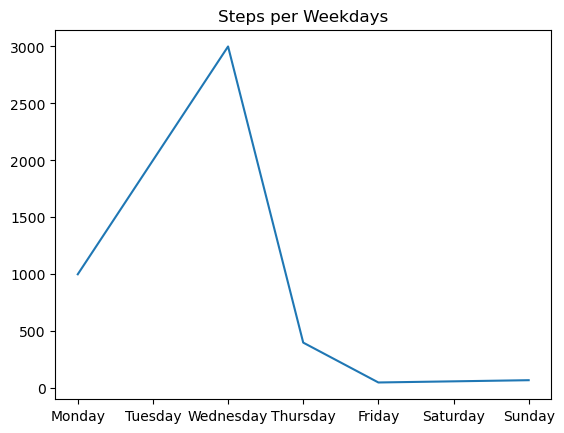

In [26]:
# your code here
plt.plot(weekdays, steps)
plt.title("Steps per Weekdays")
plt.show()

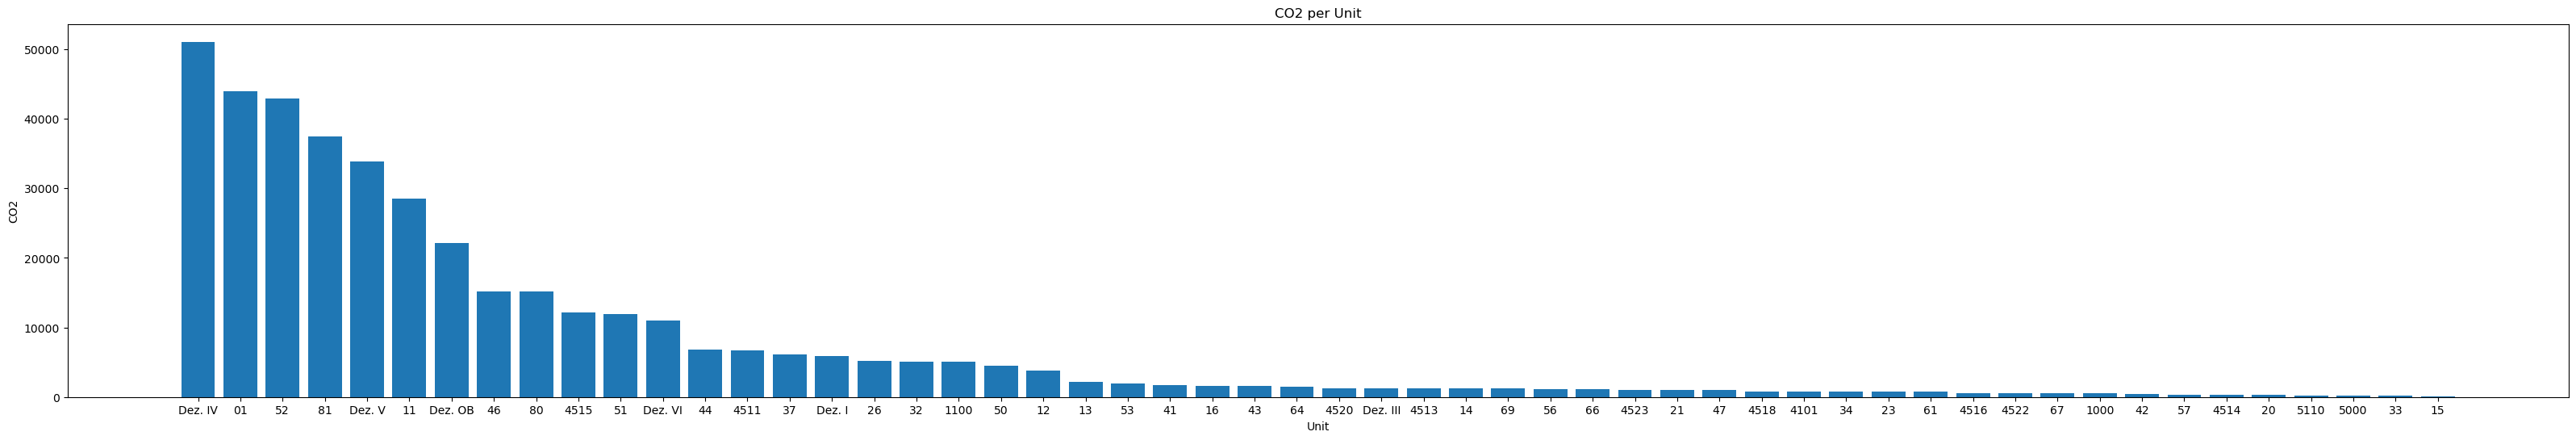

In [35]:
flightGroups = flightInfo.groupby("unit")["CO2"].sum()
flightGroups = flightGroups.sort_values(ascending=False)
plt.figure(figsize=(40, 6)) 
plt.bar(flightGroups.index, flightGroups.values)
plt.title("CO2 per Unit")
plt.xlabel("Unit")
plt.ylabel("CO2")
plt.show()

One commonly set goal is to reach 10.000 steps per day. Let's add the 10.000 daily steps target to our plot. Repeat your code from before, but before calling plt.show(), write plt.plot(...) with weekdays as x_values and 7 times 10000 as y_values.

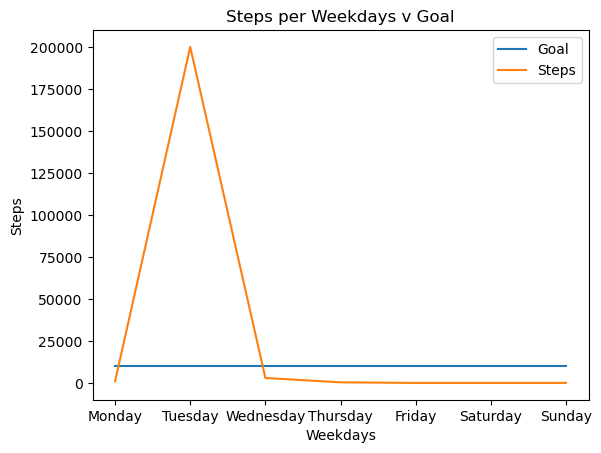

In [30]:
# your code here
goal = 10000
plt.plot(weekdays, [goal] * len(weekdays), label="Goal")
plt.plot(weekdays, steps, label="Steps")
plt.legend()
plt.title("Steps per Weekdays v Goal")
plt.xlabel("Weekdays")
plt.ylabel("Steps")
plt.show()

Now we have two lines: one for our actual daily steps, and one for the daily target of 10.000 steps. Let us add a legend to our plot to include this information. Do this by including the label parameter in each of your plt.plot() functions (e.g., `plt.plot(..., label="label")`), and call `plt.legend()` before plt.show().

Finally, let's add a title and labels for the x-axis and y-axis. We can do so by calling `plt.title("title")`, `plt.xlabel("xlabel")`, and `plt.ylabel("ylabel")` before plt.show(). Create a final version of your plot with corresponding title and labels below.